In [1]:
import os
import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from scipy.interpolate import interp1d as spline

import TwoPUtils as tpu
import STX3KO_analyses as stx

rng = np.random.default_rng()

%matplotlib inline


%load_ext autoreload
%autoreload 2

/home/mplitt/mambaforge/envs/STX3/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### CA3 inputs

Each CA3 neuron's activtiy as a function of position, $g_m(x)$, is determined by a radial basis function. 
 $$ g_m \left(x \right) = \exp{\frac{\left( x - \bar{x}_m \right)^2}{\sigma^2}}$$
CA3 neuron's activity is constant  in time



(140, 1000)


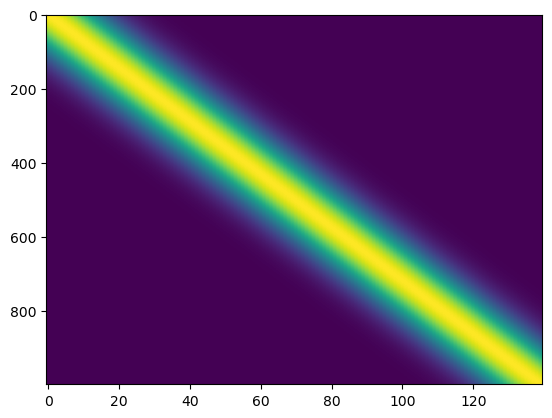

In [2]:
x_max = 100 # number of spatial bins
n_ca1 = 100 # number of CA1 neurons
n_ca3 = 140 # number of CA3 neurons

sigma_ca3 = 15

ca3_centers = np.linspace(-20,x_max+20, num=n_ca3)[:, np.newaxis]
ca3_func = lambda x: np.exp(-((x-ca3_centers)**2)/sigma_ca3**2)

fig, ax = plt.subplots()
x = np.linspace(-20,x_max+20,num=1000)
ca3_out = ca3_func(x[np.newaxis,:])
print(ca3_out.shape)
ax.imshow(ca3_out.T, aspect='auto')

## CA1 dynamics

Each CA1 neuron's activity as a function of time, $f_n(t)$, is determined by the following dynamics: 

$$\tau \frac{df_n}{dt} = -f_n + \left[ \sum_m w_{m,n} g_m - \beta \sum_i f_i \right]_0 $$


$ w_{m,n}$ is the synaptic weight from CA3 neuron $m$ to CA1 neuron $n$

$g_m$ is the activity of CA3 neuron $m$

$\beta$ is a constant that determines the sparsity of the representation

Weight updates are carried out according to a modified version of Oja's rule

$$ \frac{dw_{m,n}}{dt} = \left( 1 - C_{re} \right) \left( \eta f_n g_m - \alpha f_n^2 w_{m,n} \right)$$

$\eta$ is the learning rate

$\alpha$ is a constant

$C_{re}$ is a binary variable representing whether or not we are in the Cre or Control condition








In [3]:

class CA1Network:
    def __init__(self):
        # number of neurons
        self.n_ca1 = 100
        self.n_ca3 = 100
        
        
        self.inib_strength = 3000/n_ca3 # inibitory strength 
        
        self.ca1_tau = 2 # ca1 time constant
        self.syn_th_tau = 100 # synaptic threshold time constant
        
        self.oja_const = 1E-6
        
        # CA3 params
        self.sigma_ca3 = 15
        self.x_max = 100
        self.ca3_centers = np.linspace(-20,x_max-20, num=n_ca3)[:, np.newaxis]
        self.ca3_func = lambda x: np.exp(-((x-ca3_centers)**2)/sigma_ca3**2)
        
        
        self.eta = 1E-5 # learning rate
        # self.ca3_ltp_th = .5 
        # self.ca1_ltp_th = 1
        
    def run_trial(self, x_vec):
        
        
        
        
        
    def _update(self):
        
        # ca3_inputs
        ca3 = self.ca3_func(self._x)
        syn = np.matmul(self.W, ca3)
        syn_rect = np.maxmimum(syn-syn_th,0)
    
        self.syn_th += 1/self.dt/self.syn_th_tau*(-self.syn_th + self.inihib_strength*self.ca1.sum())
        
        self.ca1 += 1/dt/tau(-self.ca1 + syn_rect)
                        
        self.W += self.eta*(self.ca1*ca3.T - self.decay_const*np.power(self.ca1,2)*W) # Oja's rule
        
        if self.eta>0:
            self.W += self.eta*self.ca1*ca3.T - self.oja_const*np.power(ca1,2)*W # Oja's rule
    

SyntaxError: invalid syntax (615207882.py, line 13)

In [73]:
W = rng.random((n_ca1,n_ca3))
ca1 = np.zeros((n_ca1,1))
# W = rng.lognormal(size=(n_ca1,n_ca3))

In [74]:
dt = 1 # msec

speed = .010 # cm/msec


tau = 2 # msec
beta =10/n_ca3 # inhibitory strength
syn_tau = 5
eta= 1E-5
syn_th = np.percentile(np.matmul(W,ca3_func(0)),80)


for j in range(30):
    print(j)
    x = 0
    CA1 = []
    SYN = []


    # W = rng.lognormal(size=(n_ca1,n_ca3))
    # ca1 = np.zeros((n_ca1,1))
    # ca1[:20,:]=1
    syn_rect = np.zeros((n_ca1,1))
    
    Syn_th=[]
    w_max =1
    
    g0=.5
    t=0
    x = 0
    while x <x_max: 

        syn = np.matmul(W,ca3_func(x)) #+ 1*rng.normal(size=ca1.shape)


        syn_th += 1/dt/syn_tau*(-syn_th + beta*ca1.sum()) # 
        # syn_th += 1/dt/syn_tau*(-syn_th + np.percentile(syn,80)) # 
        # Syn_th.append(np.copy(syn_th))
        syn_rect = np.maximum(syn-syn_th,0)
        # syn_rect= np.maximum(syn-np.percentile(syn,80),0)

        # syn_rect = np.maximum(syn-beta*syn.sum(),0) # + rng.normal(size=[n_ca1,1]),0)
        # syn_rect = np.maximum(syn-beta*ca1.sum(),0) #+ rng.normal(size=[n_ca1,1]),0)
        # syn_rect = np.maximum(syn-.7*np.amax(syn),0)

        # ca1 += 1/dt/tau*-ca1
        ca1 += 1/dt/tau*(-ca1 + syn_rect)

        CA1.append(np.copy(ca1))

        # syn = np.matmul(W,ca3_func(x))
        # syn_rect = np.maximum(syn-beta*syn.sum().ravel(),0)
        SYN.append(syn)

        # W += 
        # W += eta*((ca1-0)*(w_max*np.maximum(ca3_func(x).T-.1,0)) - 1*np.power(ca1,2)*W) # Oja's rule
        
        W += eta*(np.maximum(ca1-.1,0)*np.maximum(ca3_func(x).T-.1,0) - 1*W)
        W = np.minimum(np.maximum(W,0),1)
        # W +=  eta*(np.maximum(ca1,0)*(ca3_func(x).T-.3) -W) #- .1*np.power(ca1,2)*W) # Oja's rule
        # W = np.minimum(np.maximum(W,0),1)
        # W += eta*(np.maximum(ca1-1,0)*(w_max*(ca3_func(x).T/g0-1)) - .1*np.power(ca1,2)*W) # Oja's rule w/ postsynaptic gating

        x += speed*dt
        # print(x)
    
    
    
    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [75]:
CA1 = np.squeeze(np.array(CA1))
SYN = np.squeeze(np.array(SYN))
CA1.shape



(10000, 100)

In [76]:
print(np.amax(W), np.amin(W))


2.2432110505625883e-13 4.4633113740338744e-17


(100,)


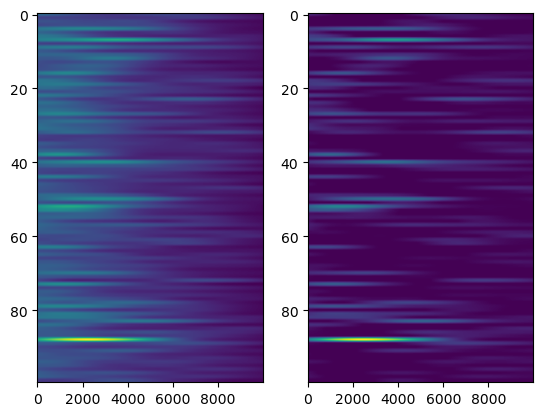

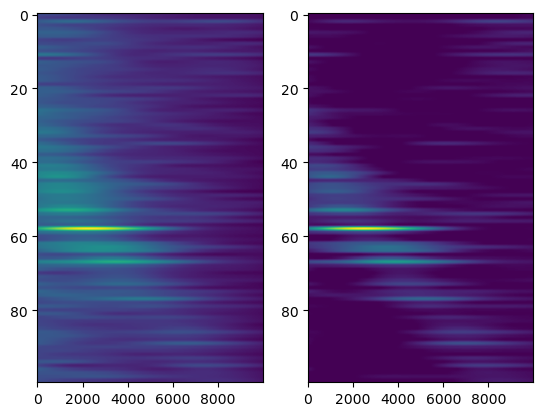

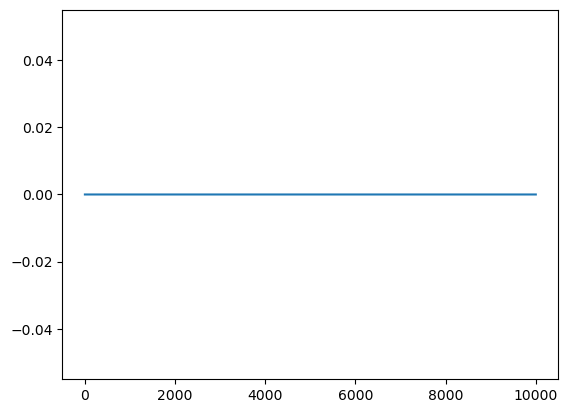

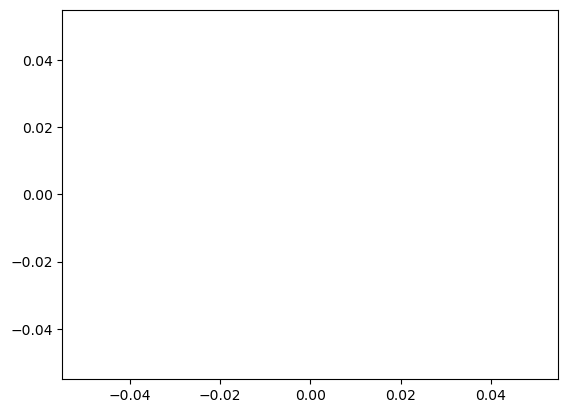

In [77]:
fig,ax = plt.subplots(1,2)
ax[0].imshow(SYN.T,aspect='auto')
ax[1].imshow(CA1.T,aspect='auto')


fig,ax = plt.subplots(1,2)

order = np.argsort(np.argmax(CA1,axis=0))
print(order.shape)
ax[0].imshow(SYN[:,order].T,aspect='auto')
ax[1].imshow(CA1[:,order].T,aspect='auto')

fig,ax=plt.subplots()
ax.plot((CA1>.1).sum(axis=1))

fig,ax = plt.subplots()
ax.plot(np.array(Syn_th))

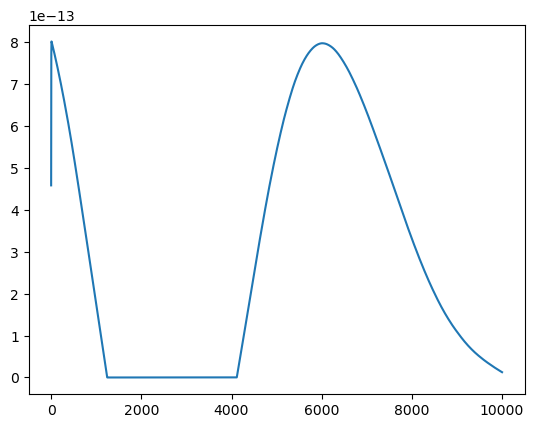

In [78]:
fig,ax = plt.subplots()
ax.plot(CA1[:,0])